<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

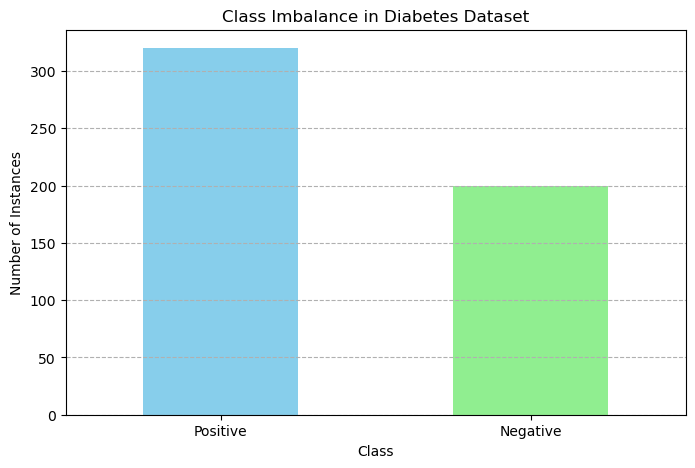

Positive    320
Negative    200
Name: class, dtype: int64


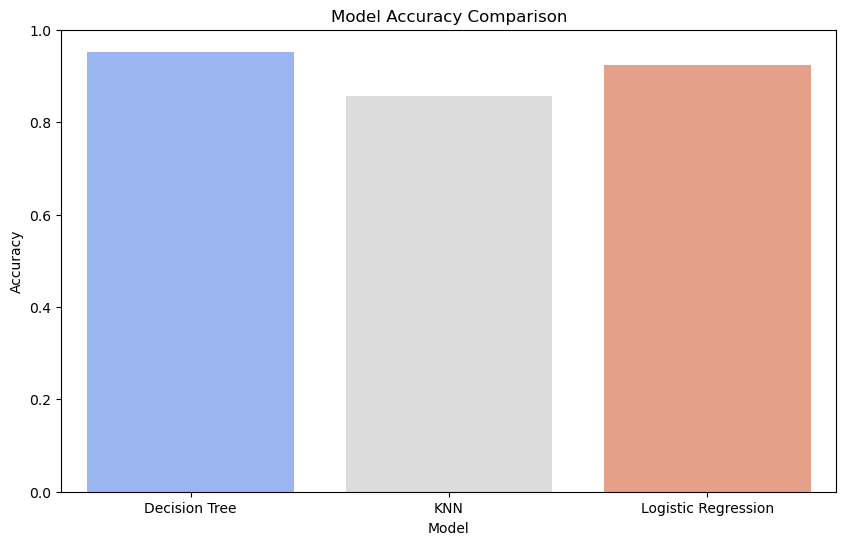

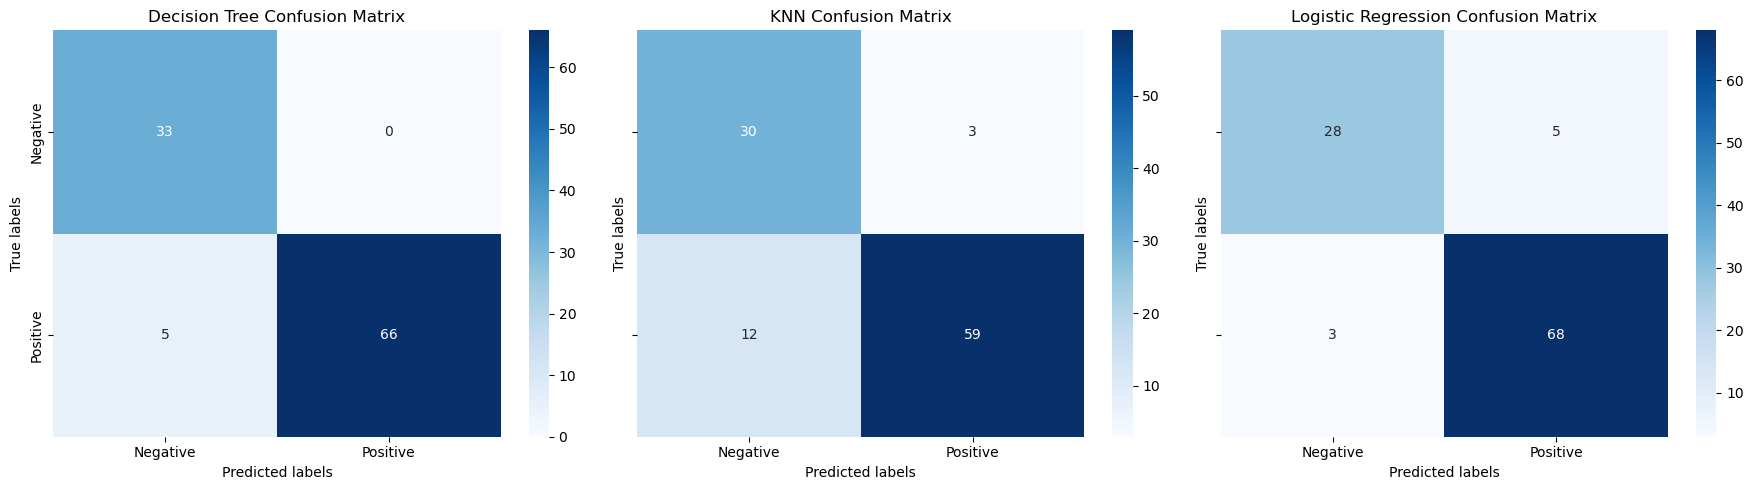

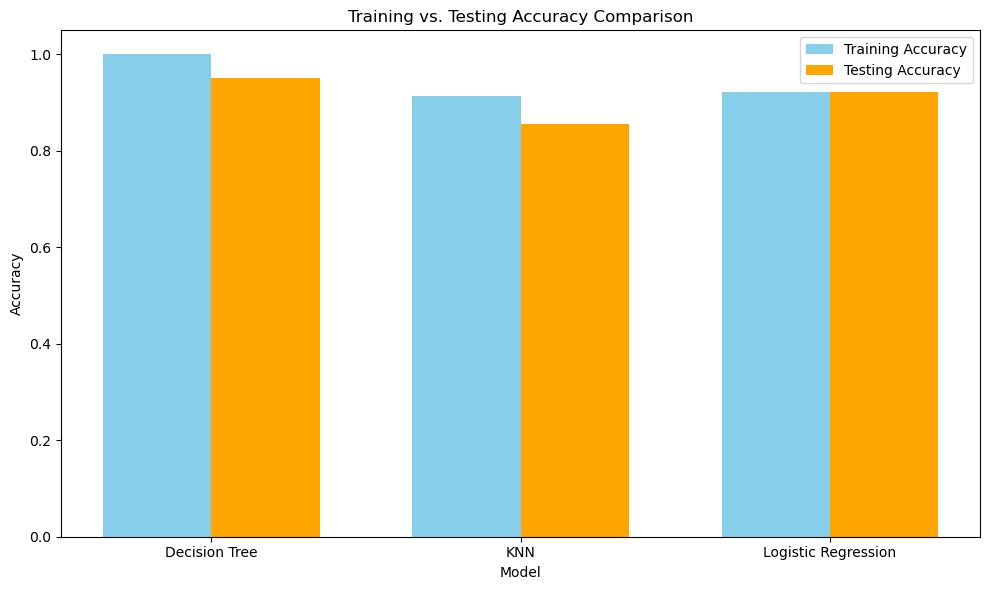

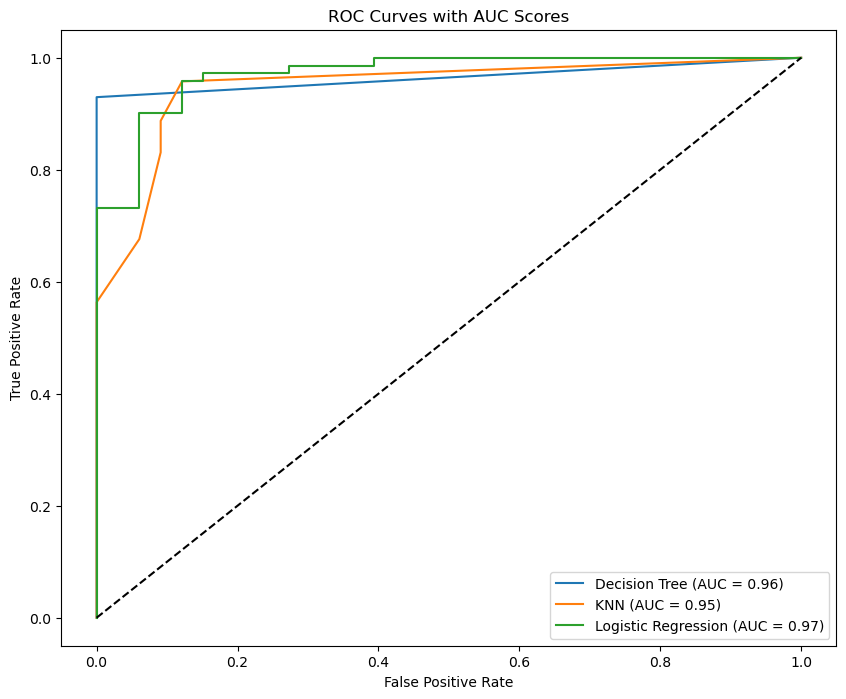

In [8]:
#######decission tree, knn, logistic reg######
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset
data_path = 'C:/Users/ksimo/OneDrive/Desktop/ML/diabetes_data_upload.csv'  
df = pd.read_csv(data_path)
df.head()
df.tail()
df.info()
df.describe()

# Encode categorical variables
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = encoder.fit_transform(df[column])

# Convert df to a NumPy array to avoid any potential issues
X = df.drop('class', axis=1).values
y = df['class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

# Print the results
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(report_dt)

print("\nK-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(report_knn)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(report_lr)

###### summary table ###########

# Splitting the dataset into the features and target variable
X = df.drop('class', axis=1).values
y = df['class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000, random_state=42)

dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Print the evaluation results for each model
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt*100:.2f}%")
print(report_dt)
print("Confusion Matrix:")
print(cm_dt)

print("\nK-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn*100:.2f}%")
print(report_knn)
print("Confusion Matrix:")
print(cm_knn)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr*100:.2f}%")
print(report_lr)
print("Confusion Matrix:")
print(cm_lr)

# Create a summary table for the accuracy of each model
models = ['Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
accuracy_scores = [accuracy_dt, accuracy_knn, accuracy_lr]

summary_table = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores
})

# Optionally, set the model names as the index
summary_table.set_index('Model', inplace=True)

# Display the summary table
print("\nSummary Table of Model Accuracies:")
print(summary_table)

######class imbalance graph ################


# Loading dataset
file_path = 'C:/Users/ksimo/OneDrive/Desktop/ML/diabetes_data_upload.csv' 
data = pd.read_csv(file_path)

# Preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Identifying categorical columns
        data[column] = label_encoder.fit_transform(data[column])

# Count the instances of each class in the target variable ('class')
class_counts = data['class'].value_counts()

# Convert the encoded labels back to their original values for plotting
class_counts.index = label_encoder.inverse_transform(class_counts.index)

# Plotting the class imbalance
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Class Imbalance in Diabetes Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Displaying the counts for reference
print(class_counts)

#####plotting accuracy bar chart and plotting confusion matrix####

# Initialize and train the models
dt_classifier = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)
lr_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Data for plotting
model_names = ['Decision Tree', 'KNN', 'Logistic Regression']
accuracies = [accuracy_dt, accuracy_knn, accuracy_lr]
cm_data = [cm_dt, cm_knn, cm_lr]

# Plotting the accuracy bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, cm in enumerate(cm_data):
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{model_names[i]} Confusion Matrix')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')
    axes[i].set_xticklabels(['Negative', 'Positive'])
    axes[i].set_yticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()

##############training vs testing graph #######

# Initialize models
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train and predict with each model
models = [dt_classifier, knn_classifier, lr_model]
model_names = ['Decision Tree', 'KNN', 'Logistic Regression']
training_accuracies = []
testing_accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Store accuracies
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

# Visualization of Training vs. Testing Accuracy
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_names))
bar_width = 0.35

training_bars = ax.bar(index - bar_width/2, training_accuracies, bar_width, label='Training Accuracy', color='skyblue')
testing_bars = ax.bar(index + bar_width/2, testing_accuracies, bar_width, label='Testing Accuracy', color='orange')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs. Testing Accuracy Comparison')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()

######### ROC CURVE WITH AUC SCORE #######

# Train models
dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict probabilities for ROC AUC
probs_dt = dt_classifier.predict_proba(X_test)[:, 1]
probs_knn = knn_classifier.predict_proba(X_test)[:, 1]
probs_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores
auc_score_dt = roc_auc_score(y_test, probs_dt)
auc_score_knn = roc_auc_score(y_test, probs_knn)
auc_score_lr = roc_auc_score(y_test, probs_lr)

# Calculate ROC curve points
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_score_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_score_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal line (represents random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with AUC Scores')
plt.legend(loc='lower right')
plt.show()
